In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import KBinsDiscretizer

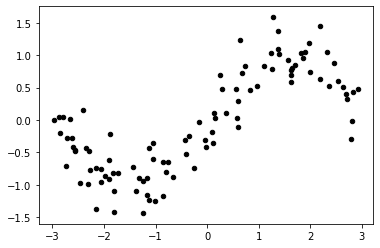

In [14]:
rnd = np.random.RandomState(42) #设置随机数种子
X = rnd.uniform(-3, 3, size=100) #random.uniform，从输入的任意两个整数中取出size个随机数

#生成y的思路：先使用NumPy中的函数生成一个sin函数图像，然后再人为添加噪音
y = np.sin(X) + rnd.normal(size=len(X)) / 3 #random.normal，生成size个服从正态分布的随机数

#使用散点图观察建立的数据集是什么样子
plt.scatter(X, y,marker='o',c='k',s=20)
plt.show()


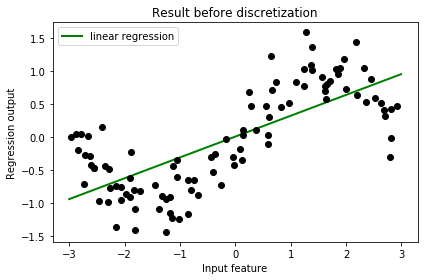

In [18]:
X.shape
X = X.reshape(-1, 1)

#使用原始数据进行建模
LinearR = LinearRegression().fit(X, y)
# TreeR = DecisionTreeRegressor(random_state=0).fit(X, y)

#放置画布
fig, ax1 = plt.subplots(1)

#创建测试数据：一系列分布在横坐标上的点
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

#将测试数据带入predict接口，获得模型的拟合效果并进行绘制
ax1.plot(line, LinearR.predict(line), linewidth=2, color='green',
label="linear regression")


#将原数据上的拟合绘制在图像上
ax1.plot(X[:, 0], y, 'o', c='k')

#其他图形选项
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")

ax1.set_title("Result before discretization")
plt.tight_layout()
plt.show()

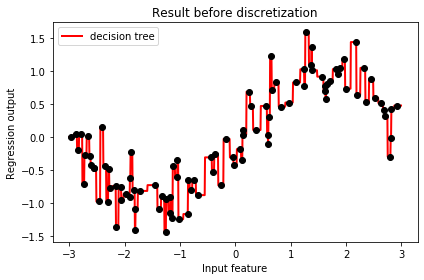

In [19]:
TreeR = DecisionTreeRegressor(random_state=0).fit(X, y)
fig, ax1 = plt.subplots(1)
ax1.plot(line, TreeR.predict(line), linewidth=2, color='red',
label="decision tree")
ax1.plot(X[:, 0], y, 'o', c='k')

#其他图形选项
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")

ax1.set_title("Result before discretization")
plt.tight_layout()
plt.show()

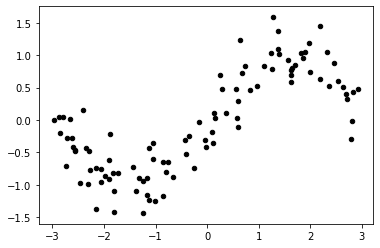

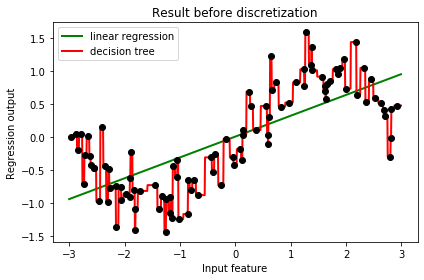

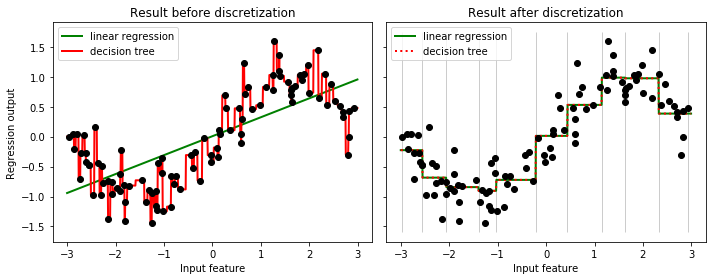

In [27]:
rnd = np.random.RandomState(42) #设置随机数种子
X = rnd.uniform(-3, 3, size=100) #random.uniform，从输入的任意两个整数中取出size个随机数
#生成y的思路：先使用NumPy中的函数生成一个sin函数图像，然后再人为添加噪音
y = np.sin(X) + rnd.normal(size=len(X)) / 3 #random.normal，生成size个服从正态分布的随机数
#使用散点图观察建立的数据集是什么样子
plt.scatter(X, y,marker='o',c='k',s=20)
plt.show()
#为后续建模做准备：sklearn只接受二维以上数组作为特征矩阵的输入
X.shape
X = X.reshape(-1, 1)

#使用原始数据进行建模
LinearR = LinearRegression().fit(X, y)
TreeR = DecisionTreeRegressor(random_state=0).fit(X, y)
#放置画布
fig, ax1 = plt.subplots(1)
#创建测试数据：一系列分布在横坐标上的点
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

#将测试数据带入predict接口，获得模型的拟合效果并进行绘制
ax1.plot(line, LinearR.predict(line), linewidth=2, color='green',
label="linear regression")
ax1.plot(line, TreeR.predict(line), linewidth=2, color='red',
label="decision tree")
#将原数据上的拟合绘制在图像上
ax1.plot(X[:, 0], y, 'o', c='k')
#其他图形选项
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")
plt.tight_layout()
plt.show()




#准备数据
enc = KBinsDiscretizer(n_bins=10,encode="onehot")
X_binned = enc.fit_transform(X)
line_binned = enc.transform(line)
#将两张图像绘制在一起，布置画布
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10, 4))
#在图1中布置在原始数据上建模的结果
ax1.plot(line, LinearR.predict(line), linewidth=2, color='green',
label="linear regression")
ax1.plot(line, TreeR.predict(line), linewidth=2, color='red',
label="decision tree")
ax1.plot(X[:, 0], y, 'o', c='k')
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")
#使用分箱数据进行建模
LinearR_ = LinearRegression().fit(X_binned, y)
TreeR_ = DecisionTreeRegressor(random_state=0).fit(X_binned, y)
ax2.plot(line 
				, LinearR_.predict(line_binned) #分箱后的特征矩阵的结果
				, linewidth=2
				, color='green'
				, linestyle='-'
				, label='linear regression')
ax2.plot(line, TreeR_.predict(line_binned), linewidth=2, color='red',
linestyle=':', label='decision tree')
#绘制和箱宽一致的竖线
ax2.vlines(enc.bin_edges_[0] #x轴
			, *plt.gca().get_ylim() #y轴的上限和下限
			, linewidth=1
			, alpha=.2)
#将原始数据分布放置在图像上
ax2.plot(X[:, 0], y, 'o', c='k')
#其他绘图设定
ax2.legend(loc="best")
ax2.set_xlabel("Input feature")
ax2.set_title("Result after discretization")
plt.tight_layout()
plt.show()
